In [1]:
from ift6758.data import get_wandb_data
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
artifact_name = "train_val_feature_eng_1"


In [3]:
get_wandb_data.download_artifact(artifact_name=artifact_name, artifact_version="v3")


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb:   4 of 4 files downloaded.  


Artifact downloaded to: ../ift6758/data/wandb_artifacts//train_val_feature_eng_1


In [4]:
df = get_wandb_data.load_all_files_from_artifact(artifact_name=artifact_name)
df


,season,game_id,event_id,angle_from_net,is_goal,empty_net,distance_from_net
0,20162017,2016020001,8,22.619865,0,0,13.000000
1,20162017,2016020001,11,77.005383,0,0,13.341664
2,20162017,2016020001,15,29.931512,0,0,76.157731
3,20162017,2016020001,16,14.995079,0,0,57.974132
4,20162017,2016020001,24,26.980231,0,0,61.717096
...,...,...,...,...,...,...,...
305809,20192020,2019021082,773,62.447188,0,0,25.942244
305810,20192020,2019021082,774,71.113913,0,0,40.162171
305811,20192020,2019021082,537,45.000000,0,0,14.142136
305812,20192020,2019021082,777,41.185925,0,0,10.630146


In [10]:
df[df["distance_from_net"] > 160]


,season,game_id,event_id,angle_from_net,is_goal,empty_net,distance_from_net
705,20162017,2016020012,356,7.431408,0,0,162.363789
1467,20162017,2016020025,84,1.363928,0,0,168.047612
1595,20162017,2016020027,264,11.243541,0,0,169.248338
1756,20162017,2016020029,904,0.707319,0,0,162.012345
1757,20162017,2016020029,905,0.682060,0,0,168.011904
...,...,...,...,...,...,...,...
305691,20192020,2019021081,63,13.616809,0,0,165.656271
305694,20192020,2019021081,69,3.127806,0,0,183.273020
305700,20192020,2019021081,84,13.535856,0,0,166.628329
305745,20192020,2019021081,726,7.125016,0,0,185.431928


# A histogram of shot counts (goals and no-goals separated), binned by distance

In [ ]:
bins = list(range(0, int(max(df["distance_from_net"])) + 10, 10))
distance_bins = pd.cut(df['distance_from_net'], bins=bins)
goal_counts = df[df['is_goal'] == 1].groupby(distance_bins).size()
no_goal_counts = df[df['is_goal'] == 0].groupby(distance_bins).size()


shot_type_distribution_distance = pd.DataFrame({
    'no-goals': no_goal_counts,
    'goals': goal_counts
}).fillna(0)

shot_type_distribution_distance


C:\Users\dre\AppData\Local\Temp\ipykernel_9208\1785359623.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_counts = df[df['is_goal'] == 1].groupby(distance_bins).size()


C:\Users\dre\AppData\Local\Temp\ipykernel_9208\1785359623.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_goal_counts = df[df['is_goal'] == 0].groupby(distance_bins).size()


,no-goals,goals
distance_from_net,,
"(0, 10]",23809,5976
"(10, 20]",51181,9892
"(20, 30]",41879,5416
"(30, 40]",45977,3463
"(40, 50]",41934,1801
"(50, 60]",42431,1332
"(60, 70]",15738,401
"(70, 80]",3456,94
"(80, 90]",2877,94


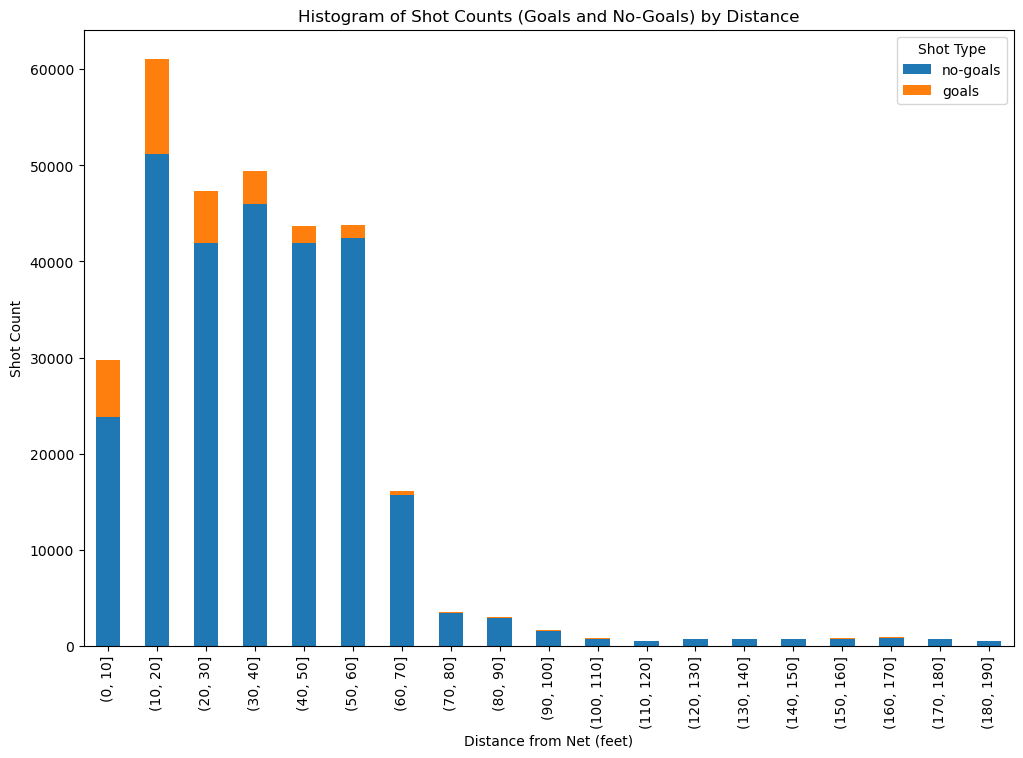

In [ ]:
shot_type_distribution_distance.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Distance from Net (feet)')
plt.ylabel('Shot Count')
plt.title('Histogram of Shot Counts (Goals and No-Goals) by Distance')
plt.legend(title='Shot Type')
plt.show()


# A histogram of shot counts (goals and no-goals separated), binned by angle

C:\Users\dre\AppData\Local\Temp\ipykernel_9208\3116473194.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_counts_angle = df[df['is_goal'] == 1].groupby(angle_bins).size()
C:\Users\dre\AppData\Local\Temp\ipykernel_9208\3116473194.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_goal_counts_angle = df[df['is_goal'] == 0].groupby(angle_bins).size()


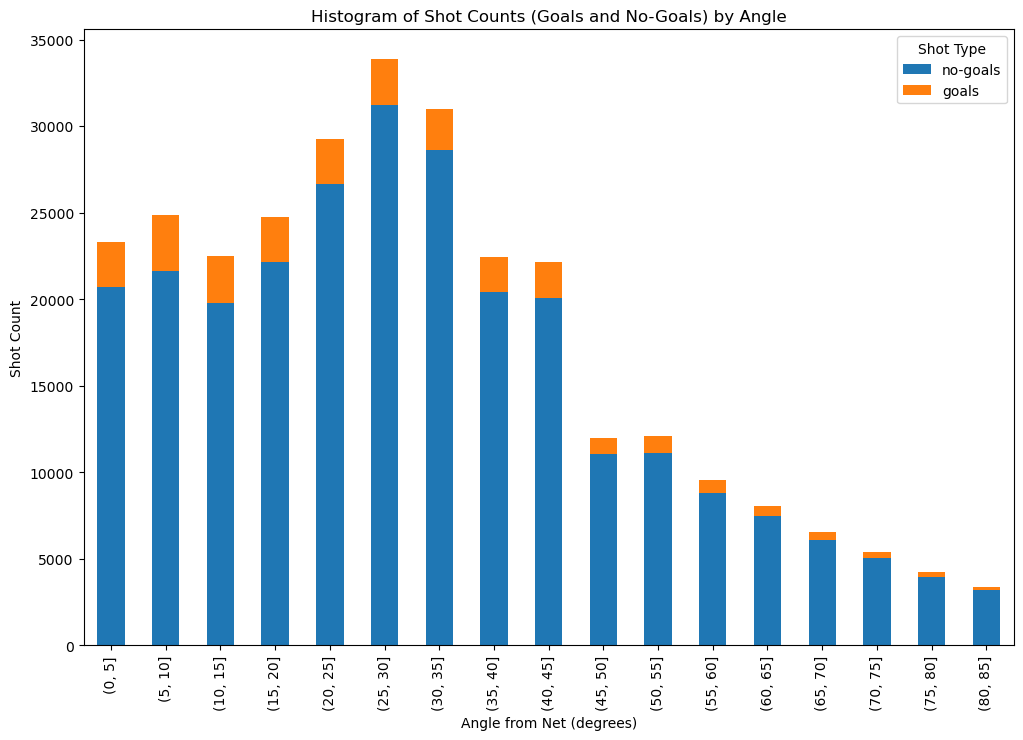

In [ ]:
angle_bins = list(range(0, 90, 5))
angle_bins = pd.cut(df['angle_from_net'], bins=angle_bins)
goal_counts_angle = df[df['is_goal'] == 1].groupby(angle_bins).size()
no_goal_counts_angle = df[df['is_goal'] == 0].groupby(angle_bins).size()

shot_type_distribution_angle = pd.DataFrame({
    'no-goals': no_goal_counts_angle,
    'goals': goal_counts_angle
}).fillna(0)

shot_type_distribution_angle.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Angle from Net (degrees)')
plt.ylabel('Shot Count')
plt.title('Histogram of Shot Counts (Goals and No-Goals) by Angle')
plt.legend(title='Shot Type')
plt.show()


#	A 2D histogram where one axis is the distance and the other is the angle

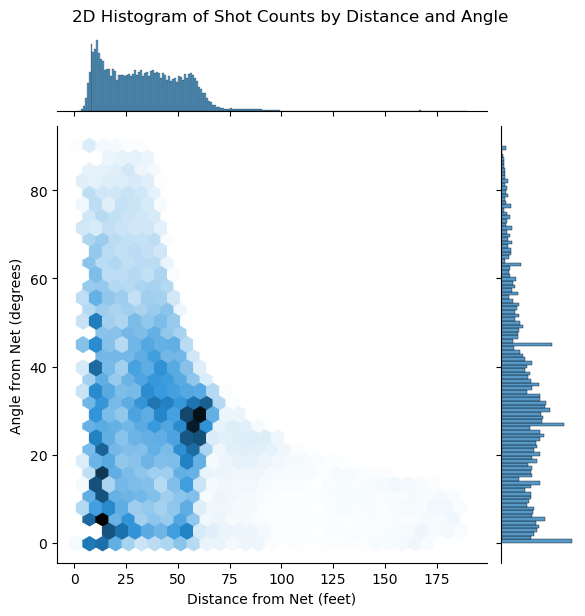

In [ ]:
import seaborn as sns

sns.jointplot(data=df, x='distance_from_net', y='angle_from_net', kind='hex', gridsize=30)

plt.xlabel('Distance from Net (feet)')
plt.ylabel('Angle from Net (degrees)')
plt.suptitle('2D Histogram of Shot Counts by Distance and Angle', y=1.02)
plt.show()


# goal rate related to distance

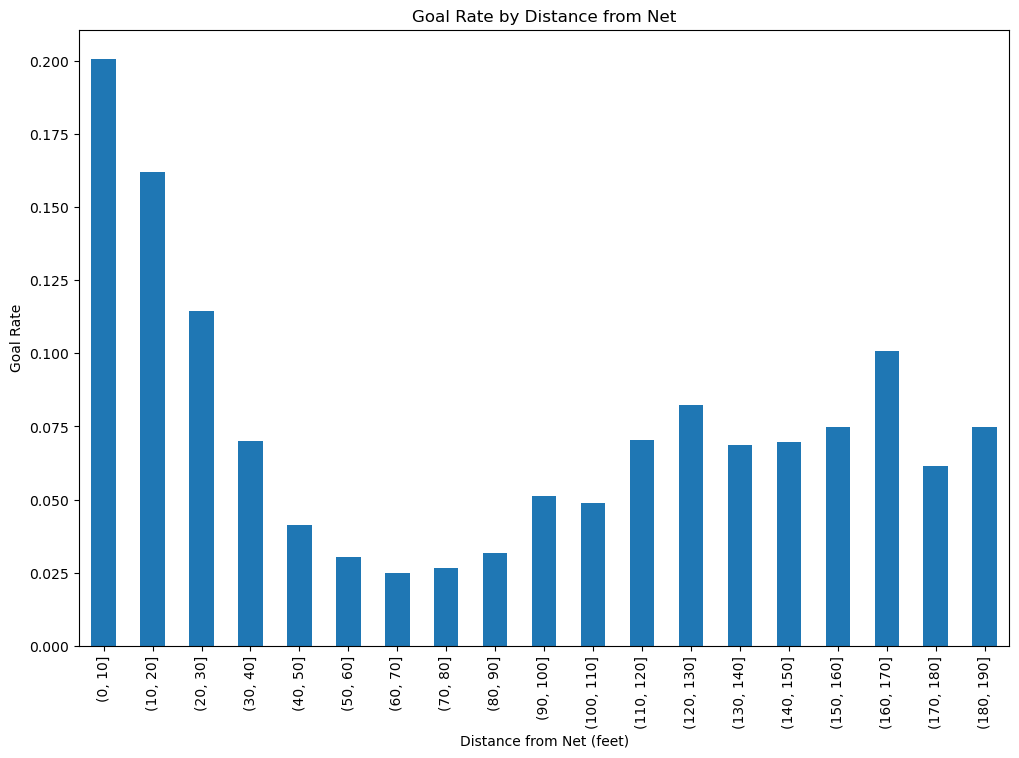

In [ ]:
shot_type_distribution_distance['goal_rate'] = shot_type_distribution_distance['goals'] / (shot_type_distribution_distance['goals'] + shot_type_distribution_distance['no-goals'])

shot_type_distribution_distance['goal_rate'].plot(kind='bar', figsize=(12, 8))
plt.xlabel('Distance from Net (feet)')
plt.ylabel('Goal Rate')
plt.title('Goal Rate by Distance from Net')
plt.show()


# goal rate related to angle

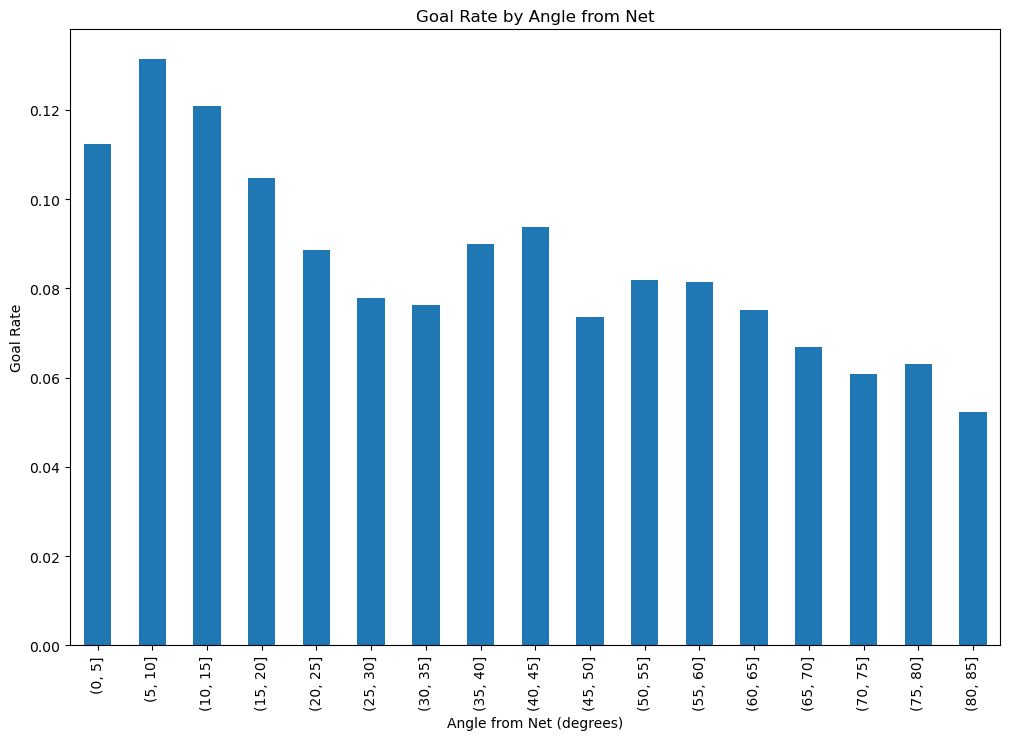

In [ ]:
shot_type_distribution_angle['goal_rate'] = shot_type_distribution_angle['goals'] / (shot_type_distribution_angle['goals'] + shot_type_distribution_angle['no-goals'])

shot_type_distribution_angle['goal_rate'].plot(kind='bar', figsize=(12, 8))
plt.xlabel('Angle from Net (degrees)')
plt.ylabel('Goal Rate')
plt.title('Goal Rate by Angle from Net')
plt.show()


# histogram ploting: separate empty net vs non-empty net events

C:\Users\dre\AppData\Local\Temp\ipykernel_9208\3240780175.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  empty_net_goals = df_defensive_zone[(df_defensive_zone['is_goal'] == 1) & (df_defensive_zone['empty_net'] == 1)].groupby(distance_bins).size()
C:\Users\dre\AppData\Local\Temp\ipykernel_9208\3240780175.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_empty_net_goals = df_defensive_zone[(df_defensive_zone['is_goal'] == 1) & (df_defensive_zone['empty_net'] == 0)].groupby(distance_bins).size()


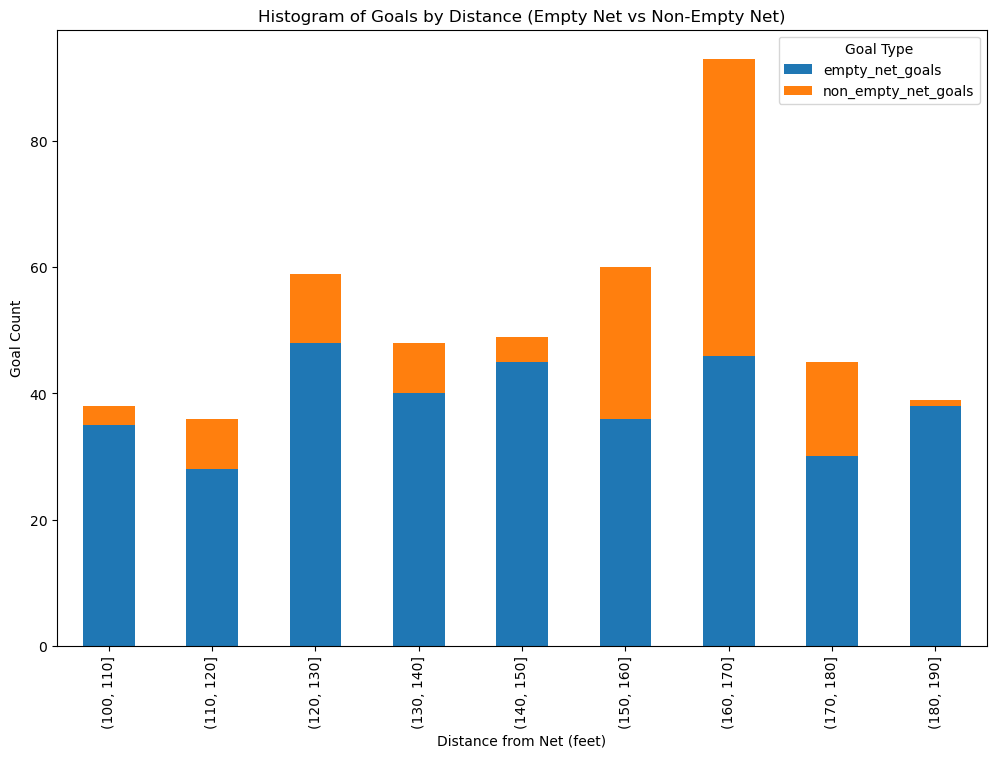

In [24]:
# Binning the distance
df_defensive_zone = df[df['distance_from_net'] > 100]
bins = list(range(100, int(max(df_defensive_zone['distance_from_net'])) + 10, 10))
distance_bins = pd.cut(df_defensive_zone['distance_from_net'], bins=bins)

# Counting goals for empty net and non-empty net
empty_net_goals = df_defensive_zone[(df_defensive_zone['is_goal'] == 1) & (df_defensive_zone['empty_net'] == 1)].groupby(distance_bins).size()
non_empty_net_goals = df_defensive_zone[(df_defensive_zone['is_goal'] == 1) & (df_defensive_zone['empty_net'] == 0)].groupby(distance_bins).size()

# Creating a DataFrame for the histogram
empty_net_distribution = pd.DataFrame({
    'empty_net_goals': empty_net_goals,
    'non_empty_net_goals': non_empty_net_goals
}).fillna(0)

# Plotting the histogram
empty_net_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Distance from Net (feet)')
plt.ylabel('Goal Count')
plt.title('Histogram of Goals by Distance (Empty Net vs Non-Empty Net)')
plt.legend(title='Goal Type')
plt.show()


In [14]:
df[(df["distance_from_net"] > 160) & (df["distance_from_net"] < 170) & (df["is_goal"] == 1) & (df["empty_net"] == 1)]


,season,game_id,event_id,angle_from_net,is_goal,empty_net,distance_from_net
10650,20162017,2016020176,764,3.468229,1,1,165.302753
51118,20162017,2016020841,698,9.697380,1,1,160.290362
52371,20162017,2016020861,725,0.355870,1,1,161.003106
59044,20162017,2016020969,657,0.351503,1,1,163.003067
70882,20162017,2016021162,540,7.386043,1,1,163.355441
71245,20162017,2016021168,588,4.969741,1,1,161.607549
102419,20172018,2017020427,744,2.459044,1,1,163.150238
108329,20172018,2017020521,704,12.914632,1,1,161.074517
110777,20172018,2017020559,635,5.102165,1,1,168.668314
118415,20172018,2017020675,627,4.969741,1,1,161.607549
